<a href="https://colab.research.google.com/github/keskinyasir/Nonlinear_Modelling_Deep_Learning/blob/main/Nonlinear_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Dropout, Flatten
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import warnings
warnings.filterwarnings('ignore')

In [3]:
X, y =make_moons(n_samples=1500, noise=0.3, random_state=0)

X, X_test, y, y_test = train_test_split(X, y, test_size = 0.333, random_state=0)

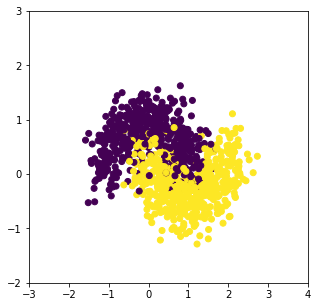

In [ ]:
plt.figure(figsize=(5, 5))
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlim(-3,4)
plt.ylim(-2,3)
plt.show()

In [ ]:
values = np.arange(-2, 2, .2)
zeros = np.zeros(len(values))
activation = np.max([values, zeros], axis=0)
print(zeros)
print(values)
print(activation)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[-2.0000000e+00 -1.8000000e+00 -1.6000000e+00 -1.4000000e+00
 -1.2000000e+00 -1.0000000e+00 -8.0000000e-01 -6.0000000e-01
 -4.0000000e-01 -2.0000000e-01 -4.4408921e-16  2.0000000e-01
  4.0000000e-01  6.0000000e-01  8.0000000e-01  1.0000000e+00
  1.2000000e+00  1.4000000e+00  1.6000000e+00  1.8000000e+00]
[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.2 0.4 0.6 0.8 1.  1.2 1.4
 1.6 1.8]


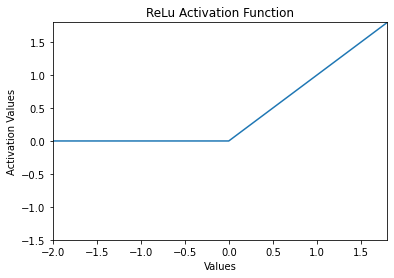

In [ ]:
fig=plt.Figure(figsize=(5,5))
plt.plot(values, activation)
plt.xlim([-2.0,1.8])
plt.ylim([-1.5,1.8])
plt.xlabel('Values')
plt.ylabel('Activation Values')
plt.title('ReLu Activation Function')
plt.show()

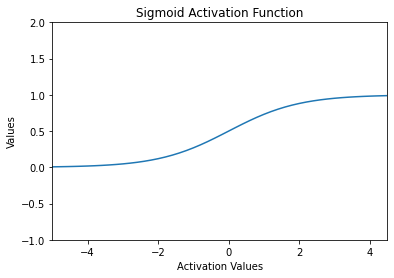

In [ ]:
values1 = np.arange(-5, 5, .2)
sigmoid = 1 / (1 + np.exp(-values1))

fig = plt.Figure(figsize=(6, 6))
plt.plot(values1, sigmoid)
plt.ylim([-1, 2])
plt.xlim([-5, 4.5])
plt.ylabel('Values')
plt.xlabel('Activation Values')
plt.title('Sigmoid Activation Function')
plt.show()

In [ ]:
# Instance Model
model = Sequential()
# Add Layers, 1.layer has 20 node and attribute(feature) is 2, activation(loss) function is Rectified Linear Unit(ReLu)
# 2.layer(Output layer) is 1 node and activation(loss) function is Sigmoid because of binary classification
model.add(Dense(20, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
# Compile Model
# Optimizaion Function is 'binary_crossentropy' because of binary classification,
# Optimization Method is 'adam',
# Success Criterion(Metric) is 'accuracy'

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Training Model,
# 'epochs' is data which processing one times at Neural Network,
# 'batch_size' is sample size that training Neural Network for one times

model.fit(X, y, epochs=50, batch_size=10)

Epoch 1/50
100/100 [==============================] - 0s 987us/step - loss: 0.2772 - accuracy: 0.8800
Epoch 2/50
100/100 [==============================] - 0s 962us/step - loss: 0.2759 - accuracy: 0.8820
Epoch 3/50
100/100 [==============================] - 0s 946us/step - loss: 0.2754 - accuracy: 0.8780
Epoch 4/50
100/100 [==============================] - 0s 943us/step - loss: 0.2728 - accuracy: 0.8830
Epoch 5/50
100/100 [==============================] - 0s 999us/step - loss: 0.2719 - accuracy: 0.8850
Epoch 6/50
100/100 [==============================] - 0s 989us/step - loss: 0.2702 - accuracy: 0.8840
Epoch 7/50
100/100 [==============================] - 0s 985us/step - loss: 0.2698 - accuracy: 0.8860
Epoch 8/50
100/100 [==============================] - 0s 927us/step - loss: 0.2683 - accuracy: 0.8850
Epoch 9/50
100/100 [==============================] - 0s 1ms/step - loss: 0.2672 - accuracy: 0.8870
Epoch 10/50
100/100 [==============================] - 0s 936us/step - loss: 0.2658 

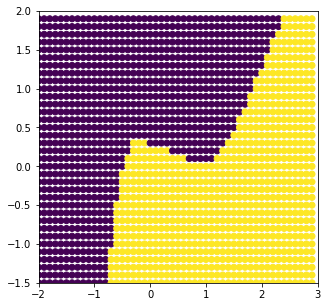

In [ ]:
# Depict nonlinear modelling

xx, yy = np.meshgrid(np.arange(-2, 3, 0.1),
                     np.arange(-1.5, 2, 0.1))
yhat = model.predict_classes(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(5,5))
plt.scatter(xx, yy, c=yhat)
plt.xlim(-2, 3)
plt.ylim(-1.5, 2)
plt.show()

In [4]:
# Functional API

inputs = Input(shape=(2, ))

layer1 = Dense(20, activation='relu')(inputs)
layer_dropout = Dropout(rate = 0.1)(layer1)
layer2 = Dense(20, activation='relu')(layer_dropout)
predictions = Dense(1, activation='sigmoid')(layer2)
model = Model(inputs = inputs, outputs = predictions)
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X, y, batch_size = 10, epochs = 50, verbose = 0)

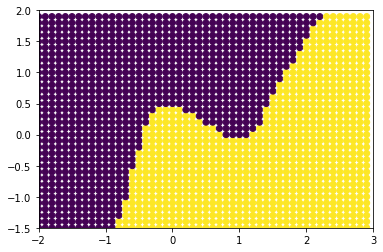

In [13]:
xx1, yy1 = np.meshgrid(np.arange(-2, 3, 0.1),
                       np.arange(-1.5, 2, 0.1))

yhat = (model.predict(np.c_[xx1.ravel(), yy1.ravel()]).reshape(xx1.shape)>0.5)*1
plt.Figure(figsize=(5, 5))
plt.scatter(xx1, yy1, c=yhat)
plt.xlim(-2, 3)
plt.ylim(-1.5, 2)
plt.show()